In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../feature_engineering/datasets/built_dataset.csv')
df.head(3)

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg
0,green hot peppers,capsicum,2021-01-01,9,102900005116226,1.1,25.8
1,green hot peppers,capsicum,2021-01-01,9,102900005116226,0.6,25.8
2,yunnan lettuces,flower,2021-01-01,9,102900005115984,0.5,6.0


In [3]:
# Remove the unnecessary columns 
df = df.drop(columns=['unit_selling_price_rmb/kg','item_code'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440716 entries, 0 to 440715
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_name         440716 non-null  object 
 1   category_name     440716 non-null  object 
 2   date              440716 non-null  object 
 3   time              440716 non-null  int64  
 4   quantity_sold_kg  440716 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 16.8+ MB


In [4]:
# 2021 sales
df['date'] = pd.to_datetime(df['date'])
df_2021 = df[df['date'].dt.year == 2021]
df_2021.head(3)

,item_name,category_name,date,time,quantity_sold_kg
0,green hot peppers,capsicum,2021-01-01,9,1.1
1,green hot peppers,capsicum,2021-01-01,9,0.6
2,yunnan lettuces,flower,2021-01-01,9,0.5


In [5]:
# 2022 sales
df['date'] = pd.to_datetime(df['date'])
df_2022 = df[df['date'].dt.year == 2022]
df_2022.head(5)

,item_name,category_name,date,time,quantity_sold_kg
254160,net lotus root,aquatic,2022-01-01,9,0.5
254161,wuhu green pepper,capsicum,2022-01-01,9,0.2
254162,caixin,flower,2022-01-01,9,0.3
254163,xixia mushroom,mushroom,2022-01-01,9,0.4
254164,shanghaiqing,flower,2022-01-01,9,0.5


{'whiskers': [<matplotlib.lines.Line2D at 0x11f71fa30>,
 'caps': [<matplotlib.lines.Line2D at 0x11f71ff70>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f71f790>],
 'medians': [<matplotlib.lines.Line2D at 0x11f73a4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f73a790>],
 'means': []}

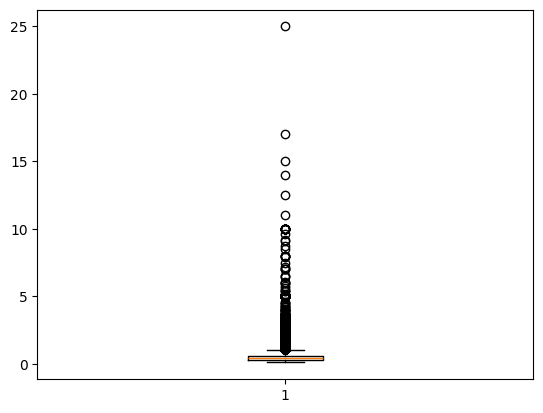

In [6]:
# plot the quantity sold (kilo)
import matplotlib.pyplot as plt
plt.boxplot(df['quantity_sold_kg'])

In [7]:
# Mean value of quantity sold (kilo)
import numpy as np
np.mean(df['quantity_sold_kg'])

0.48137644197170043

{'whiskers': [<matplotlib.lines.Line2D at 0x11f7fe610>,
 'caps': [<matplotlib.lines.Line2D at 0x11f7feb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f7fe490>],
 'medians': [<matplotlib.lines.Line2D at 0x12c00f0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c00f370>],
 'means': []}

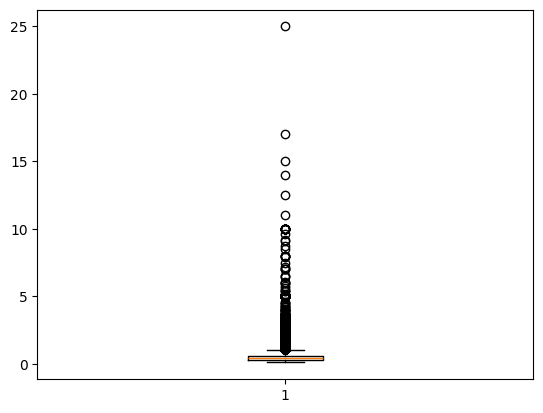

In [8]:
plt.boxplot(df['quantity_sold_kg'])

In [9]:
# Sum of the most sales of the day
df['date'] = pd.to_datetime(df['date'])
daily_sum = df.groupby(['item_name','category_name','date','time'])['quantity_sold_kg'].sum().reset_index()
daily_sum

,item_name,category_name,date,time,quantity_sold_kg
0,7 colour pepper,capsicum,2021-01-01,12,0.3
1,7 colour pepper,capsicum,2021-01-01,13,0.4
2,7 colour pepper,capsicum,2021-01-01,14,0.5
3,7 colour pepper,capsicum,2021-01-01,15,0.7
4,7 colour pepper,capsicum,2021-01-01,16,0.8
...,...,...,...,...,...
150375,zhuyecai,flower,2022-11-08,16,0.3
150376,zhuyecai,flower,2022-11-10,15,0.4
150377,zhuyecai,flower,2022-11-11,12,0.5
150378,zhuyecai,flower,2022-11-11,19,0.5


In [10]:
# Monthly sales Quantity Sold (kilo) in 2021
sales_data_2021 = df_2021.groupby(df_2021['date'].dt.month)['quantity_sold_kg'].sum().reset_index().rename(columns = {"date" : "Month"}).round(0).astype('int')
sales_data_2021

,Month,quantity_sold_kg
0,1,9847
1,2,13027
2,3,9748
3,4,8434
4,5,9133
5,6,8406
6,7,9456
7,8,11895
8,9,8856
9,10,8100


In [11]:
# Monthly sales Quantity Sold (kilo) in 2022
sales_data_2022 = df_2022.groupby(df_2022['date'].dt.month)['quantity_sold_kg'].sum().reset_index().rename(columns = {"date" : "Month"}).round(0).astype('int')
sales_data_2022

,Month,quantity_sold_kg
0,1,9047
1,2,5938
2,3,5712
3,4,5555
4,5,6270
5,6,6606
6,7,9462
7,8,13150
8,9,9932
9,10,12221


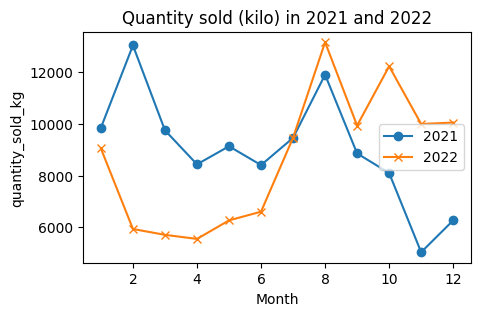

In [12]:
import matplotlib.pyplot as plt
# Plotting the scatter plot for 2021 and 2022 on the same plot
plt.figure(figsize=(5, 3))
plt.plot(sales_data_2021['Month'], sales_data_2021['quantity_sold_kg'], label='2021', marker='o')
plt.plot(sales_data_2022['Month'], sales_data_2022['quantity_sold_kg'], label='2022', marker='x')

plt.title('Quantity sold (kilo) in 2021 and 2022')
plt.xlabel('Month')
plt.ylabel('quantity_sold_kg')
plt.legend()
plt.show()

In [13]:
# within the one hour, max value of sold quantity sold (kilo) in 2021
highest_sales_in_day_2021 = df_2021.groupby(pd.to_datetime(df_2021['time'], format='%H').dt.hour)['quantity_sold_kg'].sum().reset_index().rename(columns={"time": "Hour"})
highest_sales_in_day_2021

,Hour,quantity_sold_kg
0,9,9816.9
1,10,16198.8
2,11,12599.7
3,12,6251.9
4,13,4467.7
5,14,5137.3
6,15,7812.1
7,16,10236.7
8,17,11217.0
9,18,10504.0


In [14]:
# within the one hour, max value of sold quantity sold (kilo) in 2022
highest_sales_in_day_2022 = df_2022.groupby(pd.to_datetime(df_2022['time'], format='%H').dt.hour)['quantity_sold_kg'].sum().reset_index().rename(columns={"time": "Hour"})
highest_sales_in_day_2022

,Hour,quantity_sold_kg
0,9,9669.3
1,10,14974.1
2,11,11458.8
3,12,5948.2
4,13,4257.5
5,14,4994.4
6,15,7350.7
7,16,9516.0
8,17,10299.9
9,18,9544.7


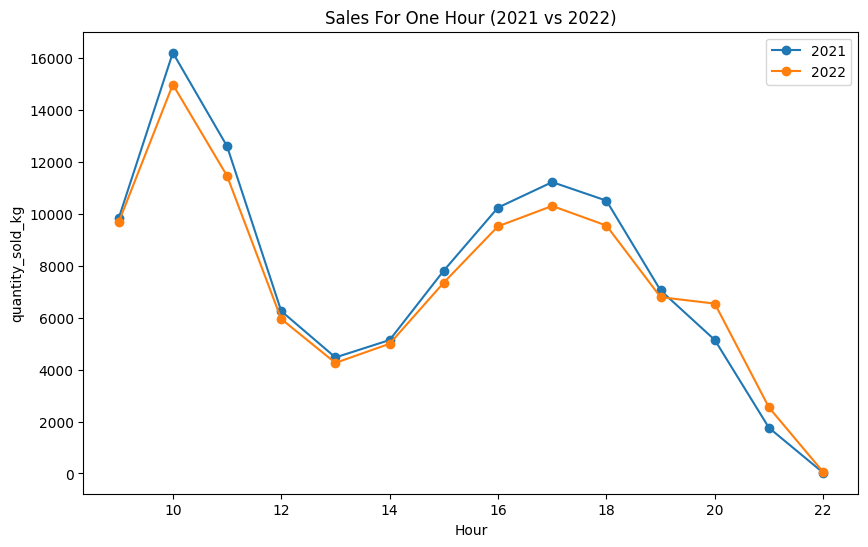

In [15]:
# Plot the different between 2021 and 2022 Quantity Sold (kilo) for hour
import matplotlib.pyplot as plt

# Plotting the difference
plt.figure(figsize=(10, 6))
plt.plot(highest_sales_in_day_2021['Hour'], highest_sales_in_day_2021['quantity_sold_kg'], label='2021', marker='o')
plt.plot(highest_sales_in_day_2022['Hour'], highest_sales_in_day_2022['quantity_sold_kg'], label='2022', marker='o')

plt.title('Sales For One Hour (2021 vs 2022)')
plt.xlabel('Hour')
plt.ylabel('quantity_sold_kg')
plt.legend()
plt.show()

In [16]:
df.head(10)

,item_name,category_name,date,time,quantity_sold_kg
0,green hot peppers,capsicum,2021-01-01,9,1.1
1,green hot peppers,capsicum,2021-01-01,9,0.6
2,yunnan lettuces,flower,2021-01-01,9,0.5
3,xixia mushroom,mushroom,2021-01-01,9,0.4
4,paopaojiao,capsicum,2021-01-01,9,0.6
5,red hang pepper,capsicum,2021-01-01,9,0.2
6,xixia mushroom,mushroom,2021-01-01,9,0.2
7,paopaojiao,capsicum,2021-01-01,9,0.4
8,paopaojiao,capsicum,2021-01-01,9,0.3
9,luosi pepper,capsicum,2021-01-01,9,0.4


In [17]:
df['time'] = df['time'].astype(int)

In [18]:
#Drop date column 
df = df.drop(columns='date')
df.to_csv('../datasets/time_analysis_preprocess_dataset.csv', index=False)
df = pd.get_dummies(df)
df.shape

(440716, 160)

In [19]:
# save built dataset
df.to_csv('../datasets/time_analysis_preprocess_dataset_ont_hot.csv', index=False)